In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import sklearn as sk
import sklearn.linear_model

os.sys.path.append('../')
import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [17]:
class LOTrialO:
    def __init__(self,starts,stops,N):
        self.train_mask = np.zeros([N,])
        self.test_mask = np.zeros([N,])
        self.c = 0
        self.starts = starts
        self.stops = stops
        self.N = N
        
    def next(self):
        if self.c<len(self.starts):
            self.train_mask *= 0
            self.test_mask *= 0
            for t,(start,stop) in enumerate(zip(self.starts,self.stops)):
                if t == self.c:
                    self.test_mask[start:stop]+=1
                else:
                    self.train_mask[start:stop]+=1
            self.c+=1
            return self.train_mask>0,self.test_mask>0
        else:
            return None, None


In [25]:
for mouse in mice[:1]:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
    
    for i in [-1]:#range(df_mouse.shape[0]):
        sess = df_mouse.iloc[i]
        VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
         
        morphs = VRDat.morph._values*4
        NTrials = tstart_inds.shape[0]
        LOO = LOTrialO(tstart_inds.tolist(),teleport_inds.tolist(),C.shape[0])
        
        yhat5way = np.zeros(morphs.shape)-1
        for t in range(NTrials):
            print(t,NTrials)
            train,test = LOO.next()
            svm = sk.linear_model.LogisticRegressionCV()
            svm.fit(C[train,:],morphs[train])
            yhat5way[test] = svm.predict(C[test,:])
            
            
        morphs = VRDat.morph._values
        trainTrials = (trial_info['morphs']==0) | (trial_info['morphs']==1)
        tstart_train,teleport_train = tstart_inds[trainTrials],teleport_inds[trainTrials]
        LOO = LOTrialO(tstart_train.tolist(),teleport_train.tolist(),C.shape[0])
        yhat2way = np.zeros(morphs.shape)-1
        Ntrials = tstart_train.shape[0]
        for t in range(Ntrials):
            print(t,NTrials)
            train,test = LOO.next()
            svm = sk.linear_model.LogisticRegressionCV()
            svm.fit(C[train,:],morphs[train])
            yhat2way[test]=svm.predict(C[test,:])
            
        train = ((morphs==0.) | (morphs==1.)) & (VRDat.pos._values>0)
        test = (VRDat.pos._values>0) & (!train)
        svm = sk.linear_model.LogisticRegressionCV()
        svm.fit(C[train,:],morphs[train])
        yhat2way[test] = svm.predict(C[test,:])
        
        
        path = 
        np.save()

G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2018\TwoTower_Timeout\TwoTower_Timeout_017_023.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2018\TwoTower_Timeout\TwoTower_Timeout_017_023.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0
0 60
1 60
2 60
3 60
4 60
5 60
6 60
7 60
8 60
9 60
10 60
11 60
12 60
13 60
14 60
15 60
16 60
17 60
18 60
19 60
20 60
21 60
22 60
23 60
24 60
25 60
26 60
27 60
28 60
29 60
30 60
31 60
32 60
33 60
34 60
35 60
36 60
37 60
38 60
39 60
40 60
41 60
42 60
43 60
44 60
45 60
46 60
47 60
48 60
49 60
50 60
51 60
52 60
53 60
54 60
55 60
56 60
57 60
58 60
59 60


NameError: name 'triali' is not defined

[[6059   92   44   61 1747]
 [ 338    0    0    2  268]
 [ 207    7    0   52  199]
 [ 275    4    9    7  388]
 [1835  119   28  243 3798]]
8714
[0.69531786 0.03878816 0.02375488 0.03155841 0.21058068]
222
[0.4144144  0.         0.03153153 0.01801802 0.536036  ]
81
[0.54320985 0.         0.         0.11111111 0.34567901]
365
[0.16712329 0.00547945 0.14246576 0.01917808 0.6657534 ]
6400
[0.27296874 0.041875   0.03109375 0.060625   0.5934375 ]
[[0.69531786 0.41441441 0.54320985 0.16712329 0.27296874]
 [0.03878816 0.         0.         0.00547945 0.041875  ]
 [0.02375488 0.03153153 0.         0.14246576 0.03109375]
 [0.03155841 0.01801802 0.11111111 0.01917808 0.060625  ]
 [0.21058068 0.53603601 0.34567901 0.66575342 0.59343749]]


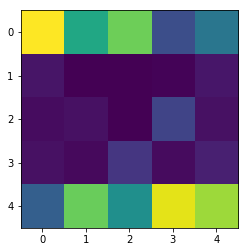

In [48]:
f,ax = plt.subplots()
conf = sk.metrics.confusion_matrix(4*morphs[yhat5way>-1],yhat5way[yhat5way>-1])
print(conf)
cc = np.zeros(conf.shape)
for j in range(conf.shape[1]):
    print(conf[:,j].sum())
    print(np.array(conf[:,j],dtype='float32')/np.float(conf[:,j].sum()))
    cc[:,j]=np.array(conf[:,j],dtype='float32')/np.float(conf[:,j].sum())
print(cc)
ax.imshow(cc)
# ax.scatter(morphs,yhat5way)

In [29]:
np.histogram(yhat5way[yhat5way>-1])

(array([8714,    0,  222,    0,    0,   81,    0,  365,    0, 6400],
       dtype=int64),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]))